# Safas image filters 

This notebook demonstrates the use of the sobel_focus filter from safas/filters. A key component of safas is the pre-defined object filters. 

## Import modules and data

Import safas  and other components for display and analysis. safas has several example images in the safas/data directory. These images are accessible as attributes of the data module because the __init__ function of safas/data also acts as a loader.   

In [1]:
import sys
sys.path.append(r'C:\Users\Ryan\Desktop\src\safas-master')
# Pacakge for viewing the images
from matplotlib import pyplot as plt

%matplotlib inline

import cv2

from safas import filters
from safas import data
from safas.filters.sobel_focus import imfilter
from safas.filters.imfilters_module import add_contours

## Process sample flocs image with threshold and sobel-based filter

Multiple steps are often requires to extract the object of interest from the image. A good introduction to image segmentation may be read in the [sci-kit image](https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html) or [OpenCV](https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html) documentation.

shape: (600, 600, 3)


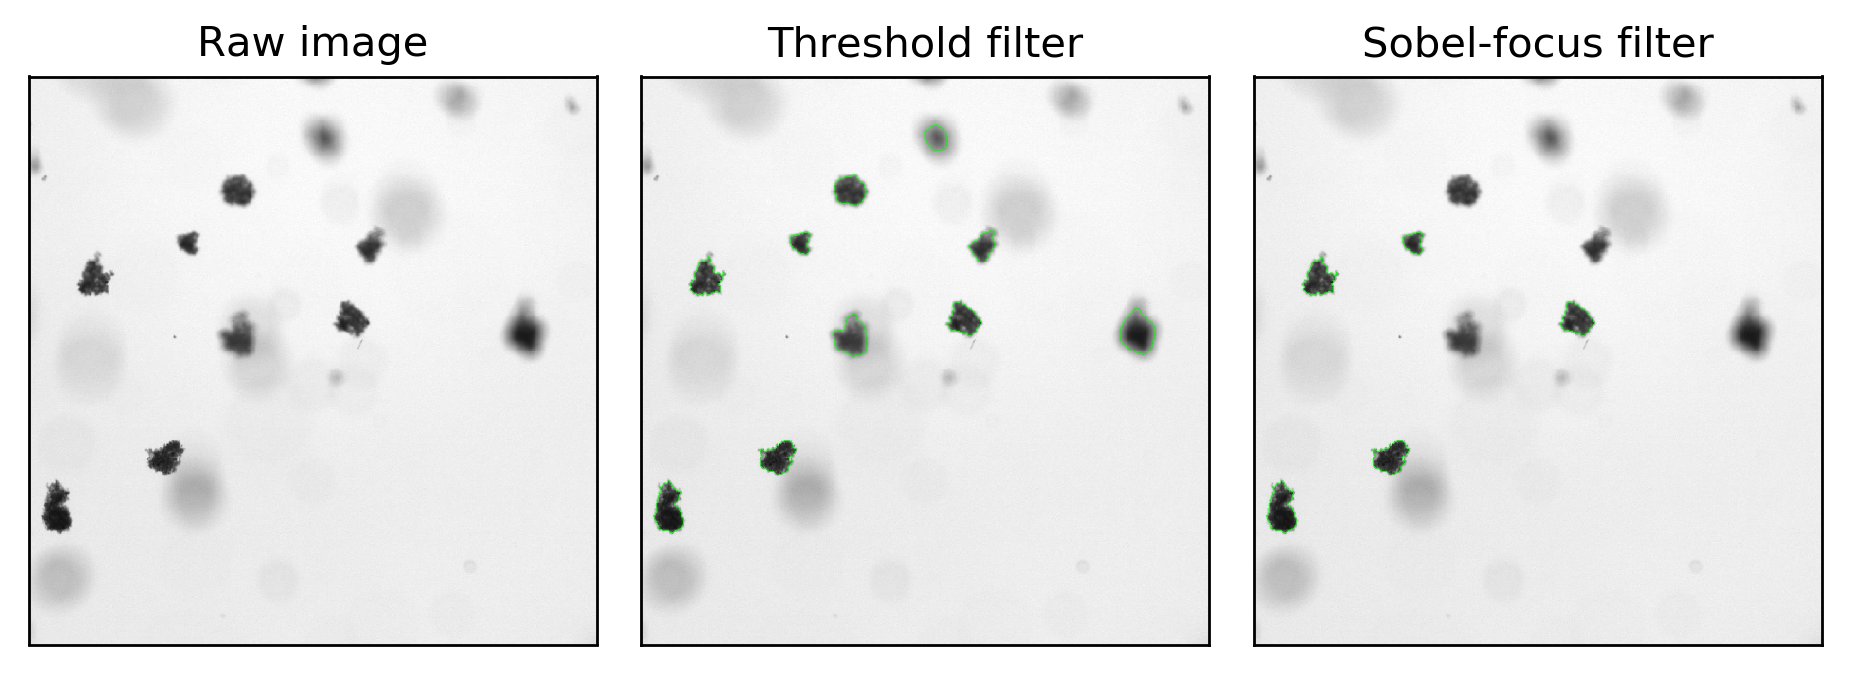

In [2]:
img = data.brightmudflocs()

img = img[400:1000, 400:1000, :]
print('shape:', img.shape)
# apply threshold to segment the image 
params = {'img_thresh': 160,
          'focus_filter': False,
          'clearborder_filter': False,
          'contour_color': (0,255,0)}
        
thresh_labels, thresh_contours = imfilter.imfilter(src=img.copy(), **params)

# apply sobel-based gradient to segment the image 
params = {'img_thresh': 160,
          'edge_thresh': 210,
          'edge_distance': 1,
          'focus_filter': True,
          'clearborder_filter': True,
          'contour_color': (0,255,0),}
        
sobel_labels, sobel_contours = imfilter.imfilter(src=img.copy(), **params)

f, ax  = plt.subplots(1,3, dpi=250, figsize=(7.5, 3.5))
ax = ax.ravel()
for a in ax: 
    a.set_xticks([])
    a.set_yticks([])
    
ax[0].imshow(img)
ax[0].set_title('Raw image')
ax[1].imshow(thresh_contours)
ax[1].set_title('Threshold filter')
ax[2].imshow(sobel_contours)
ax[2].set_title('Sobel-focus filter')
plt.tight_layout()


save = True

if save: 
    plt.savefig('png/filter_ex.png', dpi=900)